# Income Classification Final Project

The last time we used this adult income classification dataset we were trying to understand supervised classification tasks.
Now that we have been introduced to many machine learning models, we will use this dataset to analyze these models. 

The data preprocessing will remain the same from our earlier assignment

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2
import math
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [5]:
adult = pd.read_csv("adult.csv")

In [6]:
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
adult["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
adult.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
adult["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

## Lets only focous on people in the United States

In [7]:
us_adults = adult[adult["native-country"]=="United-States"]

In [8]:
us_adults.drop("native-country", inplace=True, axis=1)

C:\Users\jagri\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Data Visuals

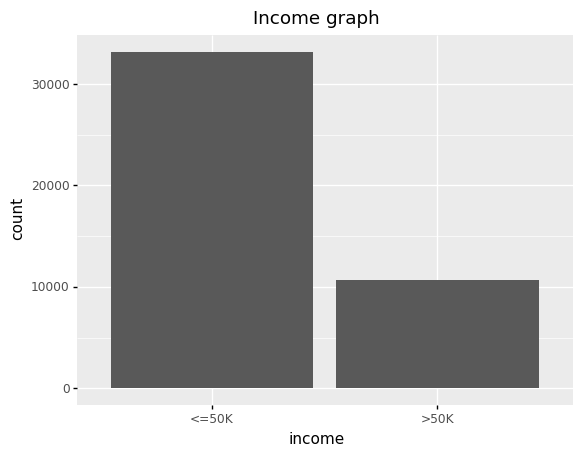

<ggplot: (158584819878)>

In [8]:
(
    ggplot(us_adults,aes(x="income"))
    +labs(title ="Income graph")
    +geom_bar(stat='count')
)

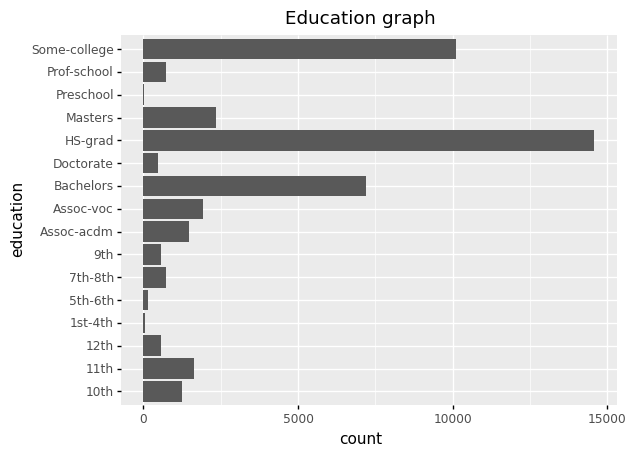

<ggplot: (158587989032)>

In [9]:
(
    ggplot(us_adults,aes(x="education"))
    +labs(title ="Education graph")
    +geom_bar(stat='count')
    +coord_flip()
)

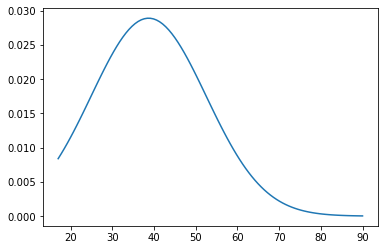

In [10]:
mean_age = us_adults["age"].mean()
std_age = us_adults["age"].std()
x_age = np.linspace(us_adults["age"].min(),us_adults["age"].max(), 100)
y_age = scipy.stats.norm.pdf(x_age,mean_age,std_age)

mean_hrs = us_adults["hours-per-week"].mean()
std_hrs = us_adults["hours-per-week"].std()
x_hrs = np.linspace(us_adults["hours-per-week"].min(),us_adults["hours-per-week"].max(), 100)
y_hrs = scipy.stats.norm.pdf(x_hrs,mean_hrs,std_hrs)

plt.plot(x_age,y_age)



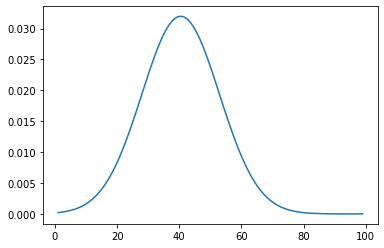

In [11]:
plt.plot(x_hrs,y_hrs)

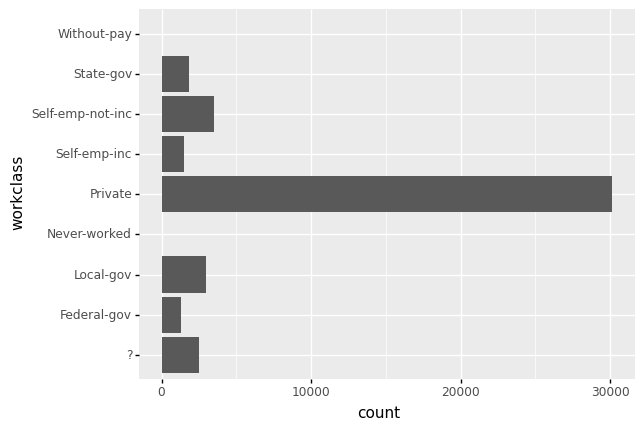

<ggplot: (158587895119)>

In [12]:
(
    ggplot(us_adults)
    + aes(x="workclass")
    +geom_bar()
    +coord_flip()
)

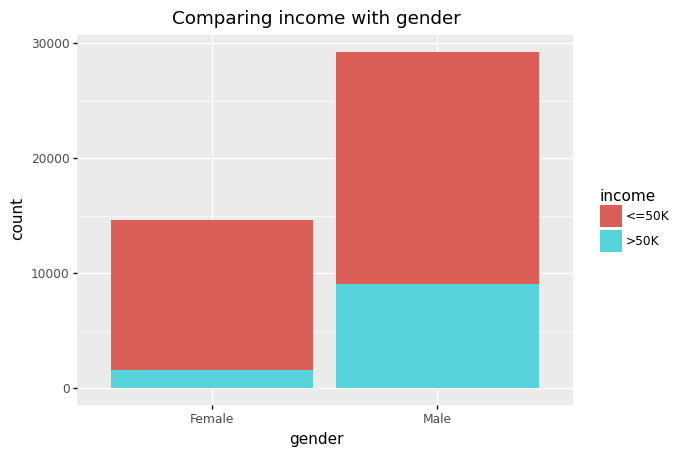

<ggplot: (158587866769)>

In [13]:
(
    ggplot(us_adults,aes(x="gender",fill="income"))
    +labs(title ="Comparing income with gender")
    +geom_bar(stat='count')
)

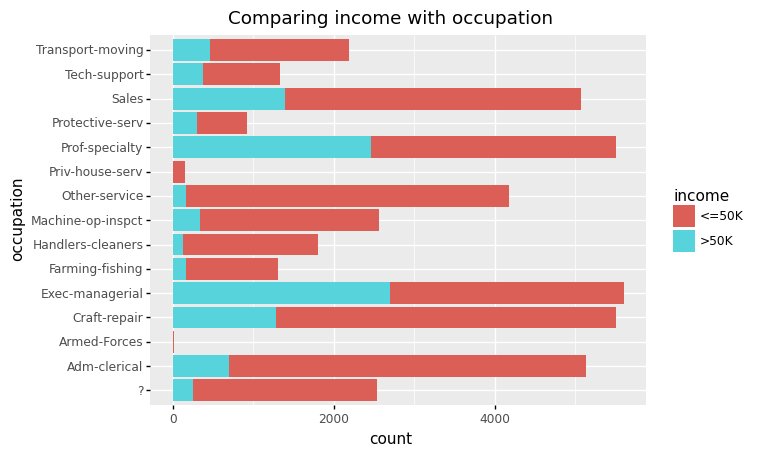

<ggplot: (158588235508)>

In [14]:
(
    ggplot(us_adults,aes(x="occupation",fill="income"))
    +labs(title ="Comparing income with occupation")
    +geom_bar(stat='count')
    +coord_flip()
)

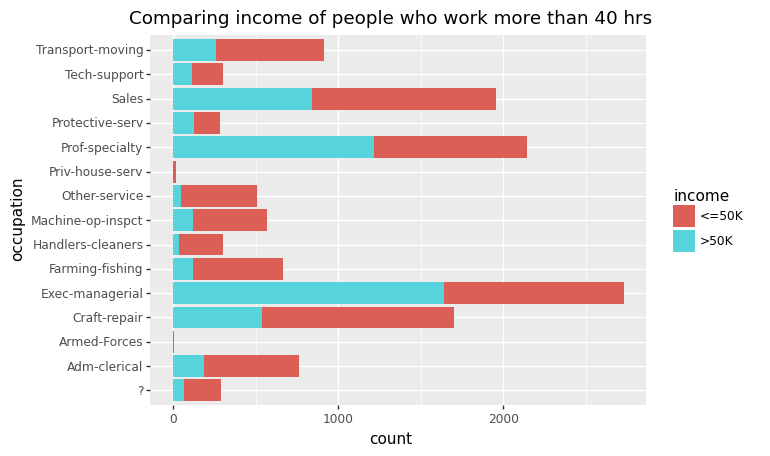

<ggplot: (139788883956)>

In [15]:
(
    ggplot(us_adults[us_adults["hours-per-week"]>40],aes(x="occupation",fill="income"))
    +labs(title="Comparing income of people who work more than 40 hrs")
    +geom_bar(stat='count')
    +coord_flip()
)

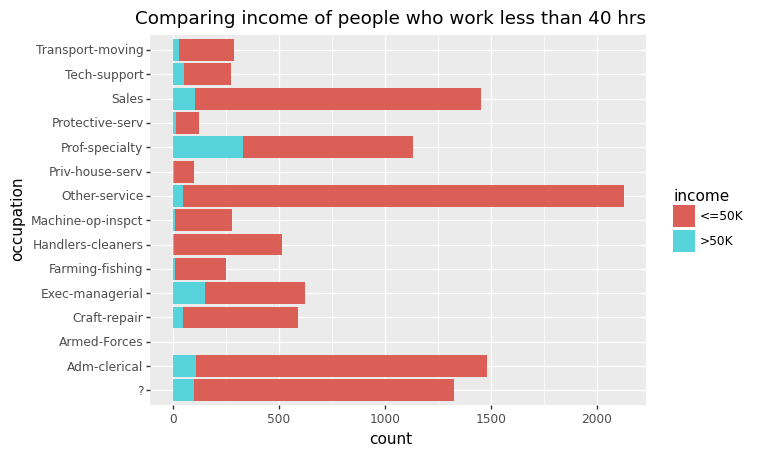

<ggplot: (139788921435)>

In [16]:
(
    ggplot(us_adults[us_adults["hours-per-week"]<40],aes(x="occupation",fill="income"))
    +labs(title="Comparing income of people who work less than 40 hrs")
    +geom_bar(stat='count')
    +coord_flip()
)

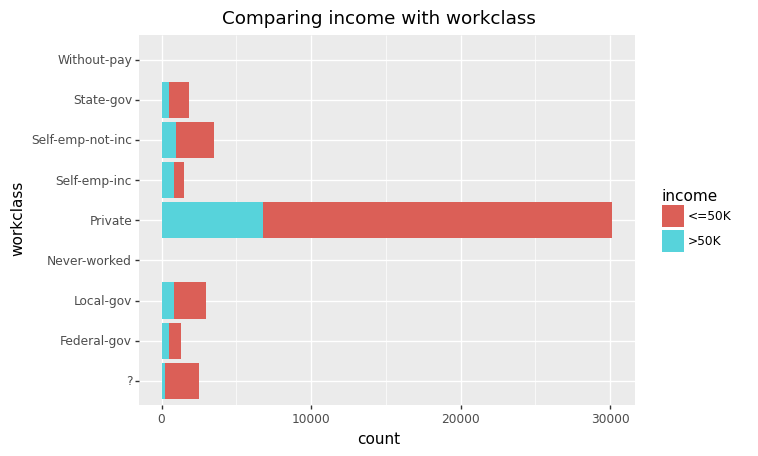

<ggplot: (139788741226)>

In [17]:
(
    ggplot(us_adults,aes(x="workclass",fill="income"))
    +labs(title ="Comparing income with workclass")
    +geom_bar(stat='count')
    +coord_flip()
)

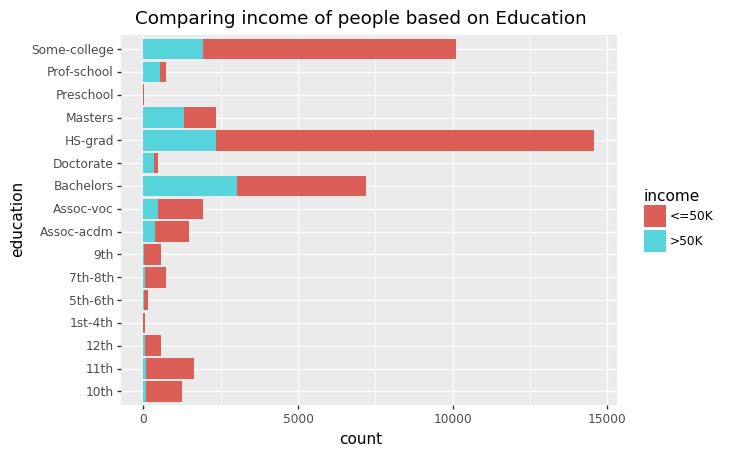

<ggplot: (139786633885)>

In [18]:
(
    #ggplot((us_adults[us_adults["hours-per-week"]>=40]),aes(x="occupation",fill="income"))
    ggplot(us_adults,aes(x="education",fill="income"))
    +labs(title="Comparing income of people based on Education")
    +geom_bar(stat='count')
    +coord_flip()
)

## Check for missing values

#### Only two columns appear to have missing values. 

In [10]:
us_adults[us_adults.isin(['?'])].dropna(how="all").count()

age                   0
workclass          2530
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2540
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [11]:
us_adults["workclass"].value_counts()

Private             30145
Self-emp-not-inc     3510
Local-gov            2941
?                    2530
State-gov            1840
Self-emp-inc         1516
Federal-gov          1320
Without-pay            20
Never-worked           10
Name: workclass, dtype: int64

#### It appears that almost all the missing values are in the same rows.
We see that all 2530 instancs of missing workclass have missing occupation. Moreover, for the remaining 10 missing occupation values we see that all these instances have persons who have "Never-worked".This seems resonable as people who have never worked do not have an occupation to put in a survey. 

In [12]:
len(us_adults[(us_adults["workclass"]=="?") & (us_adults["occupation"]=="?") ])

2530

In [13]:
len(us_adults[(us_adults["workclass"]!="?") & (us_adults["occupation"]=="?") ])

10

In [14]:
us_adults[(us_adults["workclass"]!="?") & (us_adults["occupation"]=="?") ]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
8785,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,?,Other-relative,White,Male,0,0,35,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,<=50K


#### Education vs Educational-num
It appears that both attributes convey the same information. The "Educational-num" attribute assigns each level of education a discrete integer value 1-16. 

In [15]:
us_adults["educational-num"].value_counts()

9     14570
10    10094
13     7184
14     2349
11     1918
7      1654
12     1470
6      1259
4       741
15      724
5       588
8       557
16      478
3       159
2        63
1        24
Name: educational-num, dtype: int64

In [16]:
us_adults["education"].value_counts()

HS-grad         14570
Some-college    10094
Bachelors        7184
Masters          2349
Assoc-voc        1918
11th             1654
Assoc-acdm       1470
10th             1259
7th-8th           741
Prof-school       724
9th               588
12th              557
Doctorate         478
5th-6th           159
1st-4th            63
Preschool          24
Name: education, dtype: int64

### Encoding Income(Target)

In [9]:
us_adults = adult[adult["native-country"]=="United-States"]
us_adults=us_adults.drop(["educational-num","fnlwgt","capital-gain","capital-loss"],axis=1)

In [10]:
us_adults["gender"].value_counts()

Male      29223
Female    14609
Name: gender, dtype: int64

In [11]:
encode_adults = {"income" : {"<=50K":1, ">50K":0},
                 "gender":{"Male":1,"Female":0}}

In [12]:
us_adults =us_adults.replace(encode_adults)

In [13]:
us_adults_income=us_adults[["income"]]

In [14]:
us_adults

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,1
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,1
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,0
4,18,?,Some-college,Never-married,?,Own-child,White,0,30,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,38,United-States,1
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States,0
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,40,United-States,1
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,20,United-States,1


In [15]:
us_adults.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender             int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

#### Dealing with Categorical Values (One hot encoder)

In [16]:
names=us_adults.select_dtypes(exclude="int64").columns
print(names)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'],
      dtype='object')


In [17]:
X=pd.get_dummies(us_adults, prefix=names, columns=names)

In [18]:
X

,age,gender,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_United-States
0,25,1,40,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,38,1,50,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,28,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,1,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,18,0,30,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,38,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
48838,40,1,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
48839,58,0,40,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
48840,22,1,20,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1


Are there any dublicate columns?

In [25]:
names = X.columns
data=[]
for i in names:
    for j in names:
        if(i!=j):
            if(accuracy_score(X[i],X[j])>=1.0):
                data=data+[[i,j]]
                
dublicate=pd.DataFrame(data)

In [27]:
print(dublicate)

Empty DataFrame
Columns: []
Index: []


No dublicate columns

## Train/Test split

In [28]:
X_train, X_test = train_test_split(X, test_size = 0.1, random_state =42)

In [29]:
y_train=X_train['income']
y_test=X_test['income']

In [30]:
X_train=X_train.drop(["income"],axis=1)
X_test=X_test.drop(["income"],axis=1)

### Feature Selection

This stage of machine learning is heavily influenced by domain experts. These experts will provide us with the necessary features that are the most relevant depending on what the problem question and task is at hand. 
For the purpose of this exercise we will rely on Random Forests to give help us the importance of each feature, and we can compare that to a $\chi^2$ test

### Random Forest 

We will perform a grid search to get the best hyper parameters and obtain feature importances. We will consider all features

In [41]:
X_train.shape

(39448, 62)

In [67]:
def gridSearchRandom(max_leaf, n_trees, X_train, y_train,X_test,y_test):
    data=[]
    maxAuc=0
    for i in max_leaf:
        for j in n_trees:
            temp=[]
            rf= RandomForestClassifier(max_features=62, max_leaf_nodes=i, n_estimators=j, n_jobs=-1)
            rf.fit(X_train, y_train)
            y_pred=rf.predict(X_test)
            rAccuracy=accuracy_score(y_test,y_pred)
            rAuc=roc_auc_score(y_test,y_pred)
            if(rAuc>=maxAuc):
                model=rf
            temp=[i,j,rAccuracy,rAuc]
            data=data+[temp]
    return(data,rf)

In [68]:
max_leaf=[50,100,200,500,1000]
n_trees=[500,1000,2000]
Result, model =gridSearchRandom(max_leaf, n_trees, X_train,y_train,X_test,y_test)

In [69]:
result_table=pd.DataFrame(Result,columns=["Max_leaf_nodes","n-estimators","Accuracy","AUC"])
result_table

,Max_leaf_nodes,n-estimators,Accuracy,AUC
0,50,500,0.830976,0.730172
1,50,1000,0.831204,0.728471
2,50,2000,0.831889,0.730470
3,100,500,0.833257,0.737555
4,100,1000,0.833485,0.737089
5,100,2000,0.833029,0.736169
6,200,500,0.834854,0.742322
7,200,1000,0.835766,0.743546
8,200,2000,0.834398,0.740784
9,500,500,0.831432,0.740048


We see that the best Random Forest model would have a max_leaf_node of 200 and an n-estimator of 1000.<br>
Accuracy:0.836<br>
AUC: 0.744

In [137]:
final_result=[["Random Forest","0.836","0.744"]]

### Feature importance

Let us look at what features played the most important role in this Random Forest

Now we can access the most important features

In [84]:
feature_imp=pd.DataFrame(model.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [87]:
feature_imp

,importance
marital-status_Married-civ-spouse,0.350505
age,0.147617
hours-per-week,0.101389
education_Bachelors,0.049747
occupation_Prof-specialty,0.043925
...,...
education_1st-4th,0.000119
education_Preschool,0.000050
occupation_Armed-Forces,0.000049
workclass_Never-worked,0.000000


So, let us use the features whose importance were greater than 0.03

In [197]:
features_rf=feature_imp[feature_imp['importance']>0.01].index

In [199]:
features_rf

Index(['marital-status_Married-civ-spouse', 'age', 'hours-per-week',
       'education_Bachelors', 'occupation_Prof-specialty',
       'occupation_Exec-managerial', 'education_Masters',
       'workclass_Self-emp-not-inc', 'education_Prof-school',
       'education_HS-grad', 'education_Some-college', 'workclass_Private',
       'education_Doctorate'],
      dtype='object')

### $\chi^2 test$

In [ ]:
Now we will do Statistical test to see which categories to use.

In [194]:
#Cat=X.drop(["age","hours-per-week"],axis=1)
Cat=X
names=Cat.columns
n=Cat.shape
n=n[0]
data=[]
for i in names:
    observed = pd.crosstab(Cat[i],Cat['income'])
    obs_arr= observed.to_numpy()
    val=stats.chi2_contingency(obs_arr)
    v=math.sqrt(val[0]/n*1)
    data=data+[[i,val[2],val[0],v]]

In [195]:
chi_result=pd.DataFrame(data,columns=['feature',"degree F","chi_square","Cramer's V"]).sort_values("Cramer's V",ascending=False)
chi_result=chi_result[chi_result["Cramer's V"]<0.9]
chi_result=chi_result[chi_result["Cramer's V"]>0.15]
print(chi_result)

                              feature  degree F   chi_square  Cramer's V
31  marital-status_Married-civ-spouse         1  9048.406914    0.454350
51               relationship_Husband         1  7383.303943    0.410421
0                                 age        73  4805.984013    0.331128
33       marital-status_Never-married         1  4606.917236    0.324197
2                      hours-per-week        94  3522.904764    0.283501
54             relationship_Own-child         1  2398.512826    0.233924
1                              gender         1  2118.213846    0.219831
40         occupation_Exec-managerial         1  1949.074713    0.210872
52         relationship_Not-in-family         1  1678.476095    0.195687
22                education_Bachelors         1  1448.390888    0.181780
46          occupation_Prof-specialty         1  1415.516405    0.179706
25                  education_Masters         1  1322.450544    0.173698
44           occupation_Other-service         1  10

In [202]:
features_chi=chi_result["feature"].to_numpy()

In [206]:
print(features_chi)

['marital-status_Married-civ-spouse' 'relationship_Husband' 'age'
 'marital-status_Never-married' 'hours-per-week' 'relationship_Own-child'
 'gender' 'occupation_Exec-managerial' 'relationship_Not-in-family'
 'education_Bachelors' 'occupation_Prof-specialty' 'education_Masters'
 'occupation_Other-service' 'education_Prof-school']


When comparing this result to the feature importance from our Random Forest there is alot of overlap.

Now we use these two sets of features in our models

### DecisionTree

In [127]:
def getKScore(tree_depth,X_train,y_train):
    auc=0;
    acc=0;
    auc_folds=[]
    skfolds=StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
    for train_index , test_index in skfolds.split(X_train,y_train):
        X_train_folds=X_train.iloc[train_index]
        y_train_folds=y_train.iloc[train_index]
        
        X_test_folds=X_train.iloc[test_index]
        y_test_folds=y_train.iloc[test_index]
        
        result=getModelScore(tree_depth,X_train_folds,y_train_folds,X_test_folds,y_test_folds)
        auc=auc+result[0]
        acc=acc+result[1]
    average_auc=auc/5
    average_acc=acc/5
    return average_auc,average_acc

In [128]:
def getModelScore(tree_depth,X_train,y_train,X_test,y_test):
    model=DecisionTreeClassifier(max_depth=tree_depth)
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    aucScore= roc_auc_score(y_test,y_preds)
    accScore= accuracy_score(y_test,y_preds)
    
    return aucScore,accScore

In [129]:
def TreeDepth(max_depths,X_train,y_train):
    data=[]
    for i in max_depths:
        kScore=getKScore(i,X_train,y_train)
        data=data+[[i,kScore[0],kScore[1]]]
    return data

In [209]:
max_depth=[100,500,1000]
result_array_rf=TreeDepth(max_depth,X_train[features_rf],y_train)
result_array_chi=TreeDepth(max_depth,X_train[features_chi],y_train)

In [214]:
Decision_Result_rf=pd.DataFrame(result_array_rf, columns=["Tree Depth","AUC","Accuracy"])
Decision_Result_chi=pd.DataFrame(result_array_chi, columns=["Tree Depth","AUC","Accuracy"])

In [217]:
Decision_Result_rf.sort_values('AUC',ascending=False)

,Tree Depth,AUC,Accuracy
0,100,0.710642,0.789850
2,1000,0.710139,0.790104
1,500,0.709835,0.789698


Using Feature importance, our best Decision Tree has a Depth of 1000<br>

In [219]:
Decision_Result_chi.sort_values('AUC',ascending=False)

,Tree Depth,AUC,Accuracy
2,1000,0.705317,0.791295
0,100,0.705304,0.791168
1,500,0.704725,0.790560


Using $\chi^2$, our best Decision Tree has a Depth of 1000<br>

### Validation:

In [222]:
DTree_rf=DecisionTreeClassifier(max_depth=1000)
DTree_chi=DecisionTreeClassifier(max_depth=1000)

In [224]:
DTree_rf.fit(X_train[features_rf],y_train)
DTree_chi.fit(X_train[features_chi],y_train)

DecisionTreeClassifier(max_depth=1000)

In [230]:
y_pred_rf=DTree_rf.predict(X_test[features_rf])
y_pred_chi=DTree_chi.predict(X_test[features_chi])

In [233]:
auc_score_rf=roc_auc_score(y_test,y_pred_rf)
acc_score_rf=accuracy_score(y_test,y_pred_rf)

auc_score_chi=roc_auc_score(y_test,y_pred_chi)
acc_score_chi=accuracy_score(y_test,y_pred_chi)

print("DTree from Feature importance: ")
print("Auc: ",auc_score_rf)
print("Accuracy: ", acc_score_rf)

print("DTree from chi_square: ")
print("Auc: ",auc_score_chi)
print("Accuracy: ", acc_score_chi)


DTree from Feature importance: 
Auc:  0.7004515823530528
Accuracy:  0.7867244525547445
DTree from chi_square: 
Auc:  0.6952355185965712
Accuracy:  0.7839872262773723


In [234]:
final_result=[]
final_result=final_result+[["Decision Tree from Rf","0.79","0.70"],["Decision Tree from chi","0.78","0.70"]]

### SVM

In [147]:
def getScore(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    aucScore= roc_auc_score(y_test,y_preds)
    accScore=accuracy_score(y_test,y_preds)
    return aucScore,accScore

In [153]:
def runModel(model,X_train,y_train):
    auc=0
    acc=0
    skfolds=StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
    for train_index, test_index in skfolds.split(X_train,y_train):          
        X_train_folds=X_train.iloc[train_index]
        y_train_folds=y_train.iloc[train_index]
        
        X_test_folds=X_train.iloc[test_index, :]
        y_test_folds=y_train.iloc[test_index]
        
        kScore=getScore(model,X_train_folds,y_train_folds,X_test_folds,y_test_folds)
        auc=auc+kScore[0]
        acc=acc+kScore[1]
    aucAverage=auc/3
    accAverage=acc/3
    return aucAverage,accAverage

In [154]:
def hyperTuneLinear(c_values,X_train,y_train):
    data=[]
    for i in c_values:
        temp=[]
        model_Linear= LinearSVC(C=i,loss="hinge")
        score=runModel(model_Linear,X_train,y_train)
        temp=[i,score[0],score[1]]
        data=data+[temp]
    return(data)
        

In [235]:
Linear_rf=pd.DataFrame(hyperTuneLinear([0.001,0.01,0.1,1,10,100],X_train[features_rf],y_train),columns=["C value","AUC","Accuracy"])
Linear_chi=pd.DataFrame(hyperTuneLinear([0.001,0.01,0.1,1,10,100],X_train[features_chi],y_train),columns=["C value","AUC","Accuracy"])

C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [237]:
Linear_rf.sort_values("AUC", ascending=False)

,C value,AUC,Accuracy
5,100.000,0.678054,0.751773
2,0.100,0.677449,0.818369
4,10.000,0.673383,0.777758
1,0.010,0.664967,0.812563
3,1.000,0.566524,0.674437
0,0.001,0.500000,0.756439


Our best SVM model using feature importance has a C value of of 100<br>

In [238]:
Linear_chi.sort_values("AUC", ascending=False)

,C value,AUC,Accuracy
2,0.100,0.701701,0.818445
1,0.010,0.666224,0.809395
4,10.000,0.655549,0.704697
5,100.000,0.647808,0.802068
3,1.000,0.518861,0.763030
0,0.001,0.500000,0.756439


Our best SVM model using feature importance has a C value of of 0.1<br>

#### Validation 

In [240]:
model_Linear_rf= LinearSVC(C=100,loss="hinge")
model_Linear_chi= LinearSVC(C=0.1,loss="hinge")

In [241]:
model_Linear_rf.fit(X_train[features_rf],y_train)
model_Linear_chi.fit(X_train[features_chi],y_train)

C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jagri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.1, loss='hinge')

In [243]:
y_pred_rf=model_Linear_rf.predict(X_test[features_rf])
y_pred_chi=model_Linear_chi.predict(X_test[features_chi])

In [244]:
auc_score_rf=roc_auc_score(y_test,y_pred_rf)
acc_score_rf=accuracy_score(y_test,y_pred_rf)

auc_score_chi=roc_auc_score(y_test,y_pred_chi)
acc_score_chi=accuracy_score(y_test,y_pred_chi)

print("SVM Linear from Feature importance: ")
print("Auc: ",auc_score_rf)
print("Accuracy: ", acc_score_rf)

print("SVM Linear from chi_square: ")
print("Auc: ",auc_score_chi)
print("Accuracy: ", acc_score_chi)


SVM Linear from Feature importance: 
Auc:  0.7431958316162371
Accuracy:  0.8013229927007299
SVM Linear from chi_square: 
Auc:  0.7051865799574942
Accuracy:  0.8161496350364964


### Conculsion

We see that the model that had the best performance was the Random Forest with a AUC score of 0.744 and Accuracy of 0.84<br>
The next best model was the SVM model with the features from our Random Forest which gave an AUC score of 0.743 and Accuracy of 0.80